$1.-$ Realice un notebook en el se programen y expliquen los siguientes algoritmos de integración de ecuaciones diferenciales:

$(a)$ Integración con método de Euler

$(b)$ Integración sobre serie de Taylor a $2^o$ orden

$(c)$ Integración con método de Runge-Kutta de 2$^o$ orden 

$(d)$ Integración con método de Runge-Kutta de 4$^o$ orden

Verifique el funcionamiento de sus integradores encontrando la solución de la siguiente ecuación diferencial para $y(t)$:

$$\ddot{x}+0.5\dot{x}+sin(x)=e^{-t}\,sin(3t)$$
Con condiciones iniciales $\dot{x}(0) = 1$ y $x(0) = 0$

In [85]:
from pylab import * 
%matplotlib inline

Solución:

$(a)$ Integración con método de Euler

El algoritmo de Euler utiliza esta expansión en series de Taylor
lineal para calcular una nueva aproximación $y_{k+1}$ mediante:

$$y_{k+1} = y_k +hf\left(y_k,t_k\right) $$

Siendo éste el algoritmo más sencillo para resolver numéricamente ecuaciones diferenciales ordinarias.


In [86]:
def euler(ec_diff,y_i,t_f,h=0.01):
    tiempo = arange(0,t_f+h,h)
    y = zeros(len(tiempo))
    y[0] = y_i
    for i in range(len(tiempo)-1):
        y[i+1] = y[i] + h*ec_diff(y[i],tiempo[i])
    return tiempo,y

$(b)$ Integración sobre serie de Taylor a $2^o$ orden

$$
y_{k+1} = y_k +hf + \frac{h^2}{2} \left(\frac{\partial f}{\partial y} + \frac{\partial f}{\partial t}f \right)
$$
donde $f$ y sus parciales estan evaluadas en $f(y_k,t_k)$

In [87]:
def segundo_orden(ec_diff,y_i,t_f,ec_jac,h=0.1): #dos dimensiones
    tiempo=arange(0,t_f+h,h)
    y = zeros(len(tiempo))
    y[0] = y_i #condicion inicial
    for i in range(len(tiempo)-1):
        y[i+1] = y[i] + h*ec_diff(y[i],tiempo[i])
        y[i+1] += 0.5*h*h*ec_jac(y[i],tiempo[i])[0]
        y[i+1] += 0.5*h*h*ec_jac(y[i],tiempo[i])[1]*ec_diff(y[i],tiempo[i])
    return tiempo,y

$(c)$ Integración con método de Runge-Kutta de 2$^o$ orden 

Los métodos de Runge–Kutta utilizan indirectamente el algoritmo de Taylor. En general, estos métodos evalúan f(x,y) en más de un punto en la proximidad de $(y_k,y_k)$ en lugar de evaluar derivadas de $f(y,t)$, las cuales se necesitarían para el uso directo del algoritmo por series de Taylor.

La derivación de estos métodos se acompaña de la suposición de un algoritmo particular con ciertos coeficientes indeterminados ($k_{i}$). Los valores de estos términos constantes se encuentran igualando la fórmula de Runge–Kutta de orden $n$ al algoritmo de Taylor de orden $n$.

El método de Rune-Kutta de segundo orden (método mejorado de Euler) es:
$$y_{k+1}=y_{k}+hf\left(y_{k}+\frac{1}{2}k,t_{k}+\frac{1}{2}h\right)\\
y_0=y(a)$$



In [88]:
def rk2(ec,y_i,t,h=0.1): #Runge Kutta de segundo orden
    tiempos=arange(t[0],t[1]+h,h)
    sol=zeros((len(tiempos),len(y_i)))
    sol[0,:]=y_i
    for i in xrange(len(tiempos)-1):
        k=h*ec(sol[i,:],tiempos[i])
        f=ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h) #evaluando en el i-esimo
        sol[i+1,:]=sol[i,:]+h*f #cero no esta involucrado, esta en cuenta en y_i
    return tiempos,sol

$(d)$ Integración con método de Runge-Kutta de 4$^o$ orden



Método de Runge-Kutta cuyo orden de convergencia es 4 (equivalentemente a utilizar un método basado en el desarrollo de Taylor hasta $h^4$). El método se describe como:
$$y_{k+1}=y_{k}+\frac{h}{6}\left(k_1+2k_2+2k_3+k_4\right)\\
y_0=y(a)$$

Donde las cantidades $k_{i},\,i\in\{1,...,4\}$ se calculan mediante:

$k_1=f(y_k,t_k)$

$k_2=f\left(y_k+\frac{1}{2}hk_1,t_k+\frac{1}{2}h\right)$

$k_3=f\left(y_k+\frac{1}{2}hk_2,t_k+\frac{1}{2}h\right)$

$k_4=f\left(y_k+hk_3,t_k+h\right)$

In [89]:
def rk4(ec,y_i,t,h=0.1): #Runge Kutta de segundo orden
    tiempos=arange(t[0],t[1]+h,h)
    sol=zeros((len(tiempos),len(y_i)))
    sol[0,:]=y_i
    for i in xrange(len(tiempos)-1):
        k1=ec(sol[i,:],tiempos[i])
        k2=ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
        k3=ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
        k4=ec(sol[i,:]+h*k3,tiempos[i]+h)
        #evaluando en el i-esimo
        sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) #cero no esta involucrado, esta en cuenta en p_ini
    return tiempos,sol

Verifique el funcionamiento de sus integradores encontrando la solución de la siguiente ecuación diferencial para $y(t)$:

$$\ddot{x}+0.5\dot{x}+sin(x)=e^{-t}\,sin(3t)$$
Con condiciones iniciales $\dot{x}(0) = 1$ y $x(0) = 0$

Primero se define la ecuacion diferencial; en base a un cambio de variable se llega al siguiente sistema de ecuaciones diferecnciales de primer orden:

$y=\dot{x}$

$\dot{y}=\ddot{x}=-0.5\dot{y}-sin(x)+e^{-t}\,sin(3t)$

para los correspondientes integradores anteriormente programados

In [90]:
def prueba(y,t): #x'=y, x''=y'=exp(-t)sin(3t)-sinx-0.5y, donde y[1]=y, y[0]=x
    return array([y[1],exp(-t)*sin(3*t)-0.5*y[1]-sin(y[0])])

Integrador de Euler:

Integrador sobre serie de Taylor a $2^o$ orden:



Integrador Runge-Kutta $2^{0}$ orden:

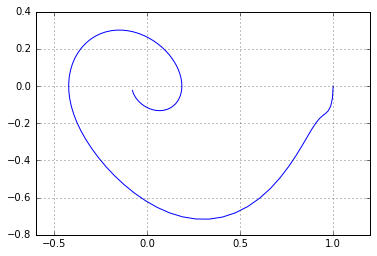

In [115]:
t,y=rk2(prueba,[1,0],[0,10])
plot(y[:,0],y[:,1])
grid(True)
show()

Integrador Runge-Kutta $4^{0}$ orden:

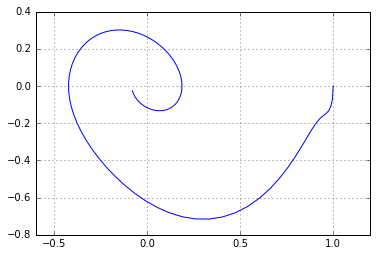

In [116]:
t,y=rk4(prueba,[1,0],[0.,10.])# [10 indica tiempo], [1.,0.] indica condicion inicial
plot(y[:,0],y[:,1])
grid(True)
show()

$2.-$ Utilizando los integradores anteriores encuentre el mejor paso de integración para la siguiente ecuación:

$$\dddot{y}+\ddot{y}^{2}-3\dot{y}^{3}+cos^{2}(y)=e^{-t}\,sin(3t)$$

Con condiciones iniciales $\ddot{y}(1) = 1$, $\dot{y}(1) = 2$, $y(1) = 1$. En particular que sucede en el intervalo $t \in [1, 2]$ y $t \in [1, 2.1]$.

$3.-$ Modifique las funciones integradoras en el problema 1 de tal manera que se puedan pasar argumentos opcionales al sistema de ecuaciones diferenciales de tal manera que se puedan modificar parámetros al momento de hacer la integración. Una vez hecho esto, obtenga la solución de la siguiente ecuación diferencial:

$$\ddot{x}+\frac{1}{10}\dot{x}+4sin(x)=\frac{1}{2}sin(\omega t)$$

Con condiciones iniciales $\dot{x}(0) = 1$ y $x(0) = 0$ y para $\omega=\{1,1.1,1.2,1.3,...,2.9,3\}$. Realice la gráfica de algunas soluciones que representen el comportamiento de la solución en función de $\omega$ y explique su resultado.

In [93]:
omega=[1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3]
def rk2_ord(ec,y_i,t,args=omega,h=0.1): #Runge Kutta de segundo orden
    tiempos=arange(t[0],t[1]+h,h)
    sol=zeros((len(tiempos),len(y_i)))
    sol[0,:]=y_i
    if args==0:
        for i in xrange(len(tiempos)-1):
            k=h*ec(sol[i,:],tiempos[i])
            f=ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h) #evaluando en el i-esimo
            sol[i+1,:]=sol[i,:]+h*f #cero no esta involucrado, esta en cuenta en y_i
    else:
        for i in xrange(len(tiempos)-1):
            k=h*ec(sol[i,:],tiempos[i],args)
            f=ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h,args) #evaluando en el i-esimo
            sol[i+1,:]=sol[i,:]+h*f #cero no esta involucrado, esta en cuenta en y_i
    return tiempos,sol

In [94]:
def ec_dif(y,t,omega): #x'=y, x''=y'=sin(omega*t)-4sinx-0.1y, donde y[1]=y, y[0]=x
    return array([y[1],0.5*sin(1.1*t)-0.1*y[1]-4*sin(y[0])])

def ec_dif_1(y,t,omega): #x'=y, x''=y'=sin(omega*t)-4sinx-0.1y, donde y[1]=y, y[0]=x
    return array([y[1],0.5*sin(2.1*t)-0.1*y[1]-4*sin(y[0])])

def ec_dif_2(y,t,omega): #x'=y, x''=y'=sin(omega*t)-4sinx-0.1y, donde y[1]=y, y[0]=x
    return array([y[1],0.5*sin(1.5*t)-0.1*y[1]-4*sin(y[0])])

def ec_dif_3(y,t,omega): #x'=y, x''=y'=sin(omega*t)-4sinx-0.1y, donde y[1]=y, y[0]=x
    return array([y[1],0.5*sin(2.5*t)-0.1*y[1]-4*sin(y[0])])

def ec_dif_4(y,t,omega): #x'=y, x''=y'=sin(omega*t)-4sinx-0.1y, donde y[1]=y, y[0]=x
    return array([y[1],0.5*sin(3*t)-0.1*y[1]-4*sin(y[0])])



A continuación se presenta la gráfica de las soluciones que representan el comportamiento de la solución en función de  $\omega$, para $\omega=\{1.1,2.1,1.5,2.5,3\}$

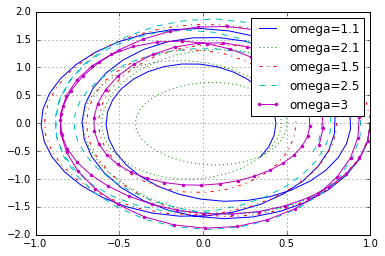

In [114]:
t,sol_ec=rk2_ord(ec_dif,[1,0],[0,10])
t,sol_ec_1=rk2_ord(ec_dif_1,[1,0],[0,10])
t,sol_ec_2=rk2_ord(ec_dif_2,[1,0],[0,10])
t,sol_ec_3=rk2_ord(ec_dif_3,[1,0],[0,10])
t,sol_ec_4=rk2_ord(ec_dif_4,[1,0],[0,10])
plot(sol_ec[:,0],sol_ec[:,1],linestyle='-',label="omega=1.1")
plot(sol_ec_1[:,0],sol_ec_1[:,1],linestyle=':',label="omega=2.1")
plot(sol_ec_2[:,0],sol_ec_2[:,1],linestyle='-.',label="omega=1.5")
plot(sol_ec_3[:,0],sol_ec_3[:,1],linestyle='--',label="omega=2.5")
plot(sol_ec_4[:,0],sol_ec_4[:,1],marker='.',label="omega=3")
grid(True)
legend()
show()

$4.-$ Considere el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt}=10(y-x)$$
$$\frac{dy}{dt}=x(28-z)-y$$
$$\frac{dz}{dt}=xy-\frac{8}{3}z$$

Realice una integración numérica del sistema de ecuaciones con alguno de los integradores del problema (el más le guste) y realice los siguientes ejercicios:
$(a)$ Elija una condición inicial aleatoria en el $x, y, z \in [−5, 5]$ y realice la gráfica de la solución en el plano $xy$, $xz$ y $yz$ y comente sus observaciones.

$(b)$ Ahora tome 3 soluciones precidas. Para ello proponga 3 condiciones iniciales tales que en la coordenada en $y$ las condiciones iniciales difieran entre si en $10^{−2}$. Explique lo que observa. 

Nota: De preferencia realice integraciones con tiempos relativamente largos en los que pueda apreciar diferencias en el comportamiento de las soluciones